In [125]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [4]:
data_path = '/Users/mincheolkim/Google Drive/UCSF/research/parameter_estimation/ercc/'

### Read the ERCC dataset and the data sheet

In [81]:
ercc_data_sheet = pd.read_csv(data_path + 'ercc_concentrations.txt', sep='\t')

In [82]:
adata = sc.read_mtx(data_path + 'ercc92/matrix.mtx').T
adata.obs = pd.read_csv(data_path + 'ercc92/barcodes.tsv', sep='\t', header=None, index_col=0)
adata.var = pd.read_csv(data_path + 'ercc92/genes.tsv', sep='\t', header=None, index_col=0)

In [83]:
adata.var['ERCC ID'] = adata.var.iloc[:, 0]

In [84]:
adata.var = adata.var.merge(ercc_data_sheet, on='ERCC ID', how='left')
adata.var.index = adata.var[1]

AnnData expects string indices for some functionality, but your first two indices are: Int64Index([0, 1], dtype='int64'). 


In [85]:
adata = adata[:, adata.var['expected fold-change ratio'] == 1].copy()
adata.X = adata.X.toarray()

### Get total molecule counts that were loaded and expected

In [188]:
# Parameters to assume
gem_count = 8e5
dilution = 10
ercc_initial_volume = 10 #microliters
molecules_per_attomole = 6.0221409e+23 * 10**-18


In [189]:
adata.var['input_number_molecule_per_gem'] = \
    adata.var['concentration in Mix 1 (attomoles/ul)']*\
    ercc_initial_volume*\
    molecules_per_attomole/\
    gem_count/dilution
adata.var['input_number_molecule'] = \
    adata.var['concentration in Mix 1 (attomoles/ul)']*\
    ercc_initial_volume*\
    molecules_per_attomole/dilution
adata.var['mean_expressed'] = adata.X.mean(axis=0)
adata.var['capture_rate'] = adata.var['mean_expressed']/adata.var['input_number_molecule_per_gem']

### Capture data

In [195]:
capture_df = pd.DataFrame(
    data=adata.X / adata.var.input_molecule_per_gem.values.reshape(1, -1),
    columns=adata.var.index)

In [ ]:
capture_df.mean

In [209]:
a = capture_df.values.mean(axis=1)**2
b = (capture_df.values**2).mean(axis=1)

(0, 50)

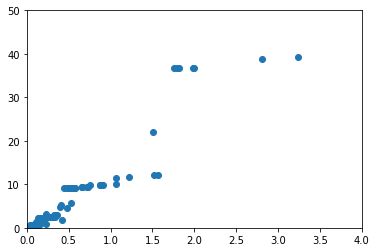

In [213]:
plt.scatter(a, b);
plt.xlim(0, 4)
plt.ylim(0, 50)

In [210]:
a

array([0.00419337, 0.03700708, 0.00763324, ..., 0.00998519, 0.02028246,
       0.02007734])

In [211]:
b

array([0.01996799, 0.38963066, 0.02102374, ..., 0.03764458, 0.16773424,
       0.06617106])

(0, 0.1)

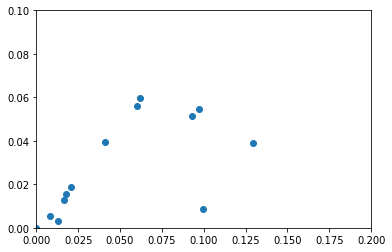

In [204]:
plt.scatter(
    (capture_df**2).mean(),
    capture_df.mean()**2
)
plt.xlim(0, 0.2);
plt.ylim(0, 0.1)

In [200]:
(capture_df**2).mean()

1
ERCC-00009     0.020566
ERCC-00025     0.008346
ERCC-00031     0.099663
ERCC-00034     0.534069
ERCC-00035     0.016280
ERCC-00042     0.060383
ERCC-00051     0.000034
ERCC-00053     0.097289
ERCC-00060     0.017890
ERCC-00067     0.129643
ERCC-00073     0.667662
ERCC-00075    39.826338
ERCC-00096     0.062221
ERCC-00104     0.881573
ERCC-00109     0.256045
ERCC-00117     5.808012
ERCC-00126     0.013142
ERCC-00138     5.185725
ERCC-00142     2.281719
ERCC-00148     0.092852
ERCC-00150     0.710404
ERCC-00158     1.607575
ERCC-00171     0.041091
dtype: float64

In [199]:
capture_df.var()

1
ERCC-00009     0.001626
ERCC-00025     0.002787
ERCC-00031     0.090952
ERCC-00034     0.371701
ERCC-00035     0.003632
ERCC-00042     0.004298
ERCC-00051     0.000033
ERCC-00053     0.042899
ERCC-00060     0.002406
ERCC-00067     0.090743
ERCC-00073     0.578107
ERCC-00075    39.747785
ERCC-00096     0.002662
ERCC-00104     0.870936
ERCC-00109     0.240185
ERCC-00117     5.773645
ERCC-00126     0.010083
ERCC-00138     5.062986
ERCC-00142     2.193756
ERCC-00148     0.041694
ERCC-00150     0.633069
ERCC-00158     1.476142
ERCC-00171     0.001755
dtype: float64

In [192]:
adata.var

,1,ERCC ID,Re-sort ID,subgroup,concentration in Mix 1 (attomoles/ul),concentration in Mix 2 (attomoles/ul),expected fold-change ratio,log2(Mix 1/Mix 2),input_molecule_per_gem,mean_expressed,input_number_molecule,input_number_molecule_per_gem,capture_rate
1,,,,,,,,,,,,,
ERCC-00009,ERCC-00009,ERCC-00009,26,B,937.500000,937.500000,1.0,0.0,564.575709,77.701477,5.645757e+08,705.719637,0.110102
ERCC-00025,ERCC-00025,ERCC-00025,30,B,58.593750,58.593750,1.0,0.0,35.285982,2.631527,3.528598e+07,44.107477,0.059662
ERCC-00031,ERCC-00031,ERCC-00031,38,B,1.831055,1.831055,1.0,0.0,1.102687,0.103448,1.102687e+06,1.378359,0.075052
ERCC-00034,ERCC-00034,ERCC-00034,35,B,7.324219,7.324219,1.0,0.0,4.410748,1.779310,4.410748e+06,5.513435,0.322723
ERCC-00035,ERCC-00035,ERCC-00035,29,B,117.187500,117.187500,1.0,0.0,70.571964,7.937931,7.057196e+07,88.214955,0.089984
ERCC-00042,ERCC-00042,ERCC-00042,27,B,468.750000,468.750000,1.0,0.0,282.287855,66.854187,2.822879e+08,352.859818,0.189464
ERCC-00051,ERCC-00051,ERCC-00051,31,B,58.593750,58.593750,1.0,0.0,35.285982,0.042365,3.528598e+07,44.107477,0.000960
ERCC-00053,ERCC-00053,ERCC-00053,32,B,29.296875,29.296875,1.0,0.0,17.642991,4.116256,1.764299e+07,22.053739,0.186647
ERCC-00060,ERCC-00060,ERCC-00060,28,B,234.375000,234.375000,1.0,0.0,141.143927,17.564531,1.411439e+08,176.429909,0.099555


In [190]:
10**-.8

0.15848931924611134

In [191]:
adata.var.capture_rate.mean()

0.16410698486456674

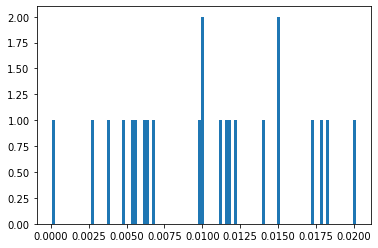

In [163]:
plt.hist(adata.var.capture_rate, bins=100);

In [117]:
adata.var.head(5)

,1,ERCC ID,Re-sort ID,subgroup,concentration in Mix 1 (attomoles/ul),concentration in Mix 2 (attomoles/ul),expected fold-change ratio,log2(Mix 1/Mix 2),input_molecule_per_gem,mean_expressed,input_number_molecule
1,,,,,,,,,,,
ERCC-00009,ERCC-00009,ERCC-00009,26,B,937.500000,937.500000,1.0,0.0,564.575709,77.701477,5.645757e+09
ERCC-00025,ERCC-00025,ERCC-00025,30,B,58.593750,58.593750,1.0,0.0,35.285982,2.631527,3.528598e+08
ERCC-00031,ERCC-00031,ERCC-00031,38,B,1.831055,1.831055,1.0,0.0,1.102687,0.103448,1.102687e+07
ERCC-00034,ERCC-00034,ERCC-00034,35,B,7.324219,7.324219,1.0,0.0,4.410748,1.779310,4.410748e+07
ERCC-00035,ERCC-00035,ERCC-00035,29,B,117.187500,117.187500,1.0,0.0,70.571964,7.937931,7.057196e+08


In [46]:
df.sort_values('concentration in Mix 1 (attomoles/ul)')

,Re-sort ID,ERCC ID,subgroup,concentration in Mix 1 (attomoles/ul),concentration in Mix 2 (attomoles/ul),expected fold-change ratio,log2(Mix 1/Mix 2)
45,46,ERCC-00075,B,0.014305,0.014305,1.00,0.00
68,69,ERCC-00057,C,0.014305,0.021458,0.67,-0.58
91,92,ERCC-00048,D,0.014305,0.028610,0.50,-1.00
22,23,ERCC-00083,A,0.028610,0.007153,4.00,2.00
90,91,ERCC-00061,D,0.057220,0.114441,0.50,-1.00
44,45,ERCC-00117,B,0.057220,0.057220,1.00,0.00
67,68,ERCC-00098,C,0.057220,0.085831,0.67,-0.58
43,44,ERCC-00138,B,0.114441,0.114441,1.00,0.00
21,22,ERCC-00017,A,0.114441,0.028610,4.00,2.00
89,90,ERCC-00086,D,0.114441,0.228882,0.50,-1.00
